<h1>2022.04.07. 선택 과제</h1>

In [63]:
## warning ignore
import warnings

warnings.filterwarnings('ignore')

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df_wine_feature = wine.feature_names
df_wine_data = pd.DataFrame(wine.data, columns = df_wine_feature)
df_wine_label = pd.DataFrame(wine.target, columns = ['label'])
## df_wine['target'] = wine.target

In [66]:
df_wine_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<h3>결측치 제거</h3>

In [67]:
df_wine_data.isnull().sum()

## 결측치 없음

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

<h3>Dataframe 통일</h3>

In [68]:
data = pd.concat([df_wine_data, df_wine_label], axis=1)

In [69]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<h2>Classification</h2>

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_wine_data, df_wine_label, test_size=0.2)

In [71]:
from sklearn.metrics import accuracy_score

<h3>KNN</h3>

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)

print(acc_knn)

0.5833333333333334


<h3>SVM</h3>

In [73]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)

print(acc_svm)

0.9166666666666666


<h3>Decision Tree</h3>

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)

print(acc_dt)

0.9166666666666666


<h3>Random Forest</h3>

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)

print(acc_rf)

0.9722222222222222


<h2>Hyper Parameter Tuning</h2>

In [76]:
from sklearn.model_selection import GridSearchCV

<h3>KNN</h3>

In [77]:
knn_params = {'n_neighbors': np.arange(1, 20),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

In [78]:
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)

In [79]:
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [80]:
print('Best Hyperparameters:', knn_gs.best_params_)
print("Best Score: ", knn_gs.best_score_)

best_index = np.argmax(knn_gs.cv_results_['mean_test_score'])

print(knn_gs.cv_results_['params'][best_index])

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score:  0.8036945812807883
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


<Axes: >

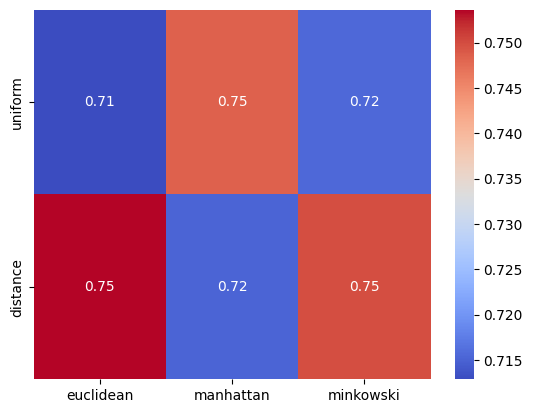

In [81]:
mean_test_scores = knn_gs.cv_results_['mean_test_score']

mean_test_scores = mean_test_scores.reshape(len(knn_params['n_neighbors']), len(knn_params['weights']), len(knn_params['metric']))

sns.heatmap(mean_test_scores.mean(axis=0), xticklabels=knn_params['metric'], yticklabels=knn_params['weights'], annot=True, cmap='coolwarm')

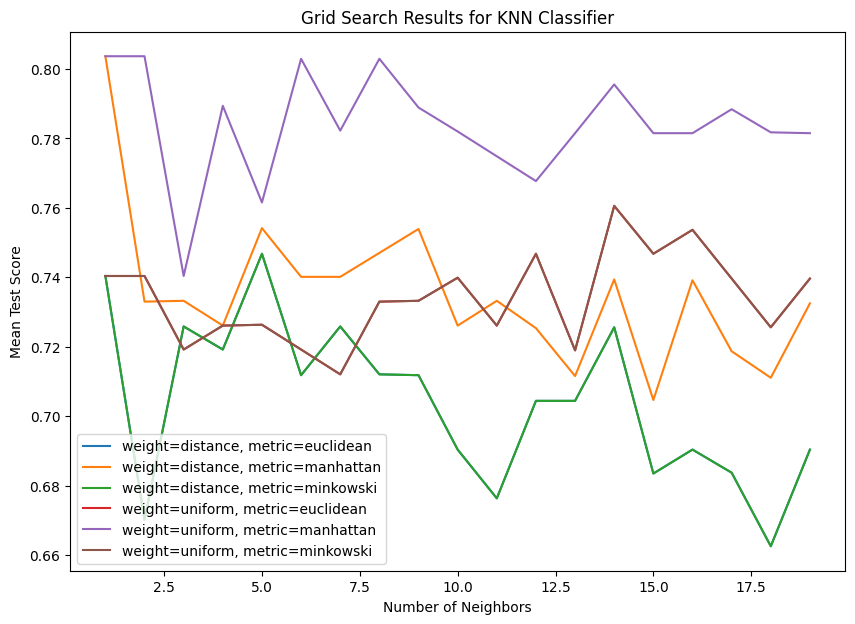

In [82]:
mean_test_scores = knn_gs.cv_results_['mean_test_score']
n_neighbors = knn_gs.cv_results_['param_n_neighbors'].data.astype(int)
weights = knn_gs.cv_results_['param_weights'].data.astype(str)
metrics = knn_gs.cv_results_['param_metric'].data.astype(str)

scores_by_params = np.zeros((len(set(n_neighbors)), len(set(weights)), len(set(metrics))))
for i, score in enumerate(mean_test_scores):
    nn_index = n_neighbors[i] - 1
    weight_index = 0 if weights[i] == 'uniform' else 1
    metric_index = 0 if metrics[i] == 'euclidean' else (1 if metrics[i] == 'manhattan' else 2)
    scores_by_params[nn_index, weight_index, metric_index] = score

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

for i, weight in enumerate(set(weights)):
    for j, metric in enumerate(set(metrics)):
        ax.plot(np.arange(1, len(set(n_neighbors))+1),
                scores_by_params[:, i, j],
                label=f'weight={weight}, metric={metric}')

ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('Mean Test Score')
ax.set_title('Grid Search Results for KNN Classifier')
ax.legend()
plt.show()

<h3>SVM</h3>

In [83]:
svm_params = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

In [84]:
svm_gs = GridSearchCV(SVC(), svm_params, cv=5)

In [85]:
svm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [86]:
print("Best Hyperparameters: ", svm_gs.best_params_)
print("Best Score: ", svm_gs.best_score_)

best_index = np.argmax(svm_gs.cv_results_['mean_test_score'])

print(svm_gs.cv_results_['params'][best_index])

Best Hyperparameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score:  0.9583743842364532
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


<Axes: >

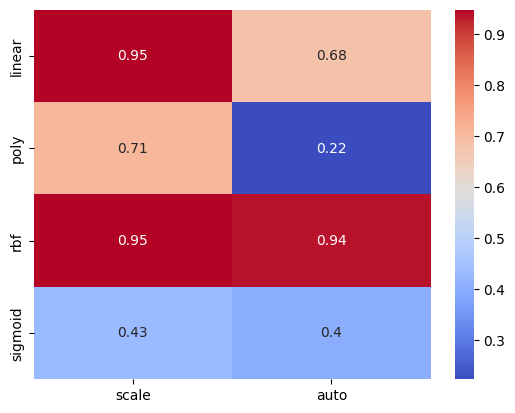

In [87]:
mean_test_scores = svm_gs.cv_results_['mean_test_score']

mean_test_scores = mean_test_scores.reshape(len(svm_params['C']), len(svm_params['kernel']), len(svm_params['gamma']))

sns.heatmap(mean_test_scores.mean(axis=0), xticklabels=svm_params['gamma'], yticklabels=svm_params['kernel'], annot=True, cmap='coolwarm')

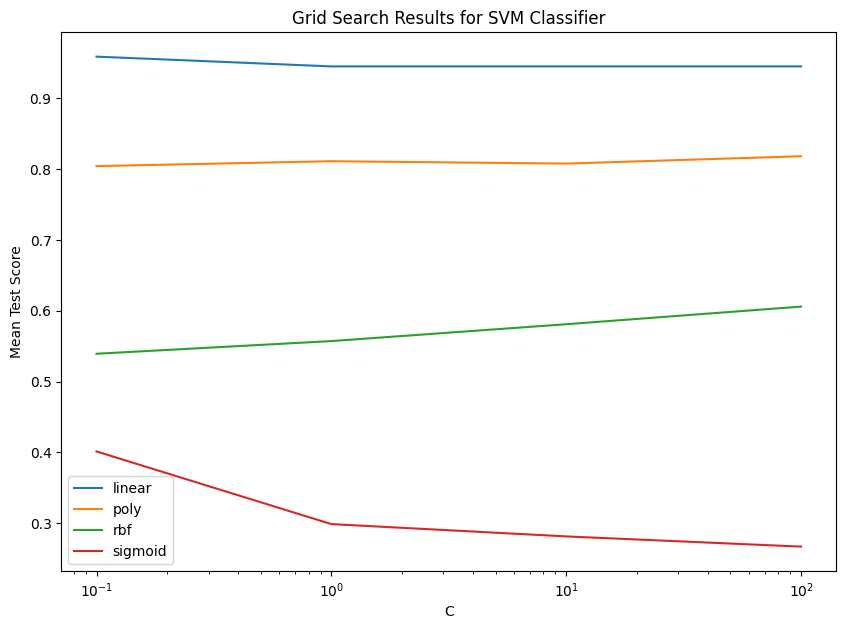

In [88]:
mean_test_scores = svm_gs.cv_results_['mean_test_score']
C_values = svm_gs.cv_results_['param_C'].data
kernel_values = svm_gs.cv_results_['param_kernel'].data
gamma_values = svm_gs.cv_results_['param_gamma'].data

scores_by_params = np.zeros((len(set(C_values)), len(set(kernel_values)), len(set(gamma_values))))
for i, score in enumerate(mean_test_scores):
    C_index = [j for j, x in enumerate(svm_params['C']) if x == C_values[i]][0]
    kernel_index = [j for j, x in enumerate(svm_params['kernel']) if x == kernel_values[i]][0]
    gamma_index = [j for j, x in enumerate(svm_params['gamma']) if x == gamma_values[i]][0]
    scores_by_params[C_index, kernel_index, gamma_index] = score

fig, ax = plt.subplots(figsize=(10, 7))

for i, kernel_type in enumerate(svm_params['kernel']):
    kernel_scores = scores_by_params[:, i, :].mean(axis=1)
    ax.plot(svm_params['C'], kernel_scores, label=kernel_type)

ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Mean Test Score')
ax.set_title('Grid Search Results for SVM Classifier')
ax.legend()
plt.show()

<h3>Decision Tree</h3>

In [89]:
dt_params = {'criterion': ['gini', 'entropy'],
             'max_depth': range(1, 20),
             'min_samples_split': range(2, 10)
}

In [90]:
dt_gs = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)

In [91]:
dt_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_split': range(2, 10)})

In [92]:
print("Best Hyperparameters: ", dt_gs.best_params_)
print("Best Score: ", dt_gs.best_score_)

best_index = np.argmax(dt_gs.cv_results_['mean_test_score'])

print(dt_gs.cv_results_['params'][best_index])

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 2}
Best Score:  0.9366995073891626
{'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 2}


<Axes: >

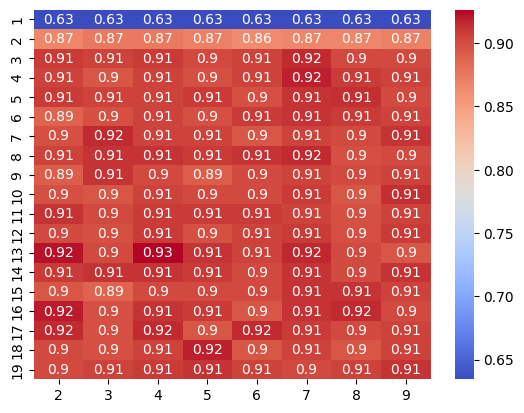

In [93]:
mean_test_scores = dt_gs.cv_results_['mean_test_score']

mean_test_scores = mean_test_scores.reshape(len(dt_params['criterion']), len(dt_params['max_depth']), len(dt_params['min_samples_split']))

sns.heatmap(mean_test_scores.mean(axis=0), xticklabels=dt_params['min_samples_split'], yticklabels=dt_params['max_depth'], annot=True, cmap='coolwarm')

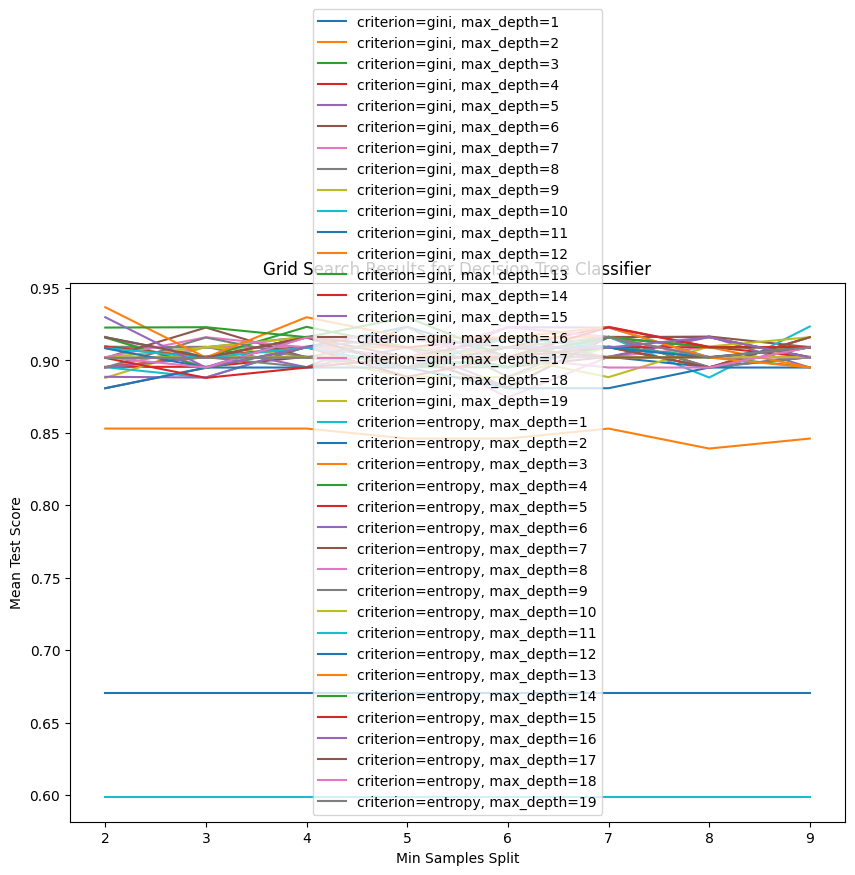

In [94]:
mean_test_scores = dt_gs.cv_results_['mean_test_score']
criterions = dt_gs.cv_results_['param_criterion'].data.astype(str)
max_depths = dt_gs.cv_results_['param_max_depth'].data.astype(int)
min_samples_splits = dt_gs.cv_results_['param_min_samples_split'].data.astype(int)

scores_by_params = np.zeros((len(set(criterions)), len(set(max_depths)), len(set(min_samples_splits))))
for i, score in enumerate(mean_test_scores):
    criterion_index = 0 if criterions[i] == 'gini' else 1
    depth_index = max_depths[i] - 1
    split_index = min_samples_splits[i] - 2
    scores_by_params[criterion_index, depth_index, split_index] = score

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

for i, criterion in enumerate(set(criterions)):
    for j, depth in enumerate(set(max_depths)):
        ax.plot(np.arange(2, len(set(min_samples_splits))+2),
                scores_by_params[i, j, :],
                label=f'criterion={criterion}, max_depth={depth}')

ax.set_xlabel('Min Samples Split')
ax.set_ylabel('Mean Test Score')
ax.set_title('Grid Search Results for Decision Tree Classifier')
ax.legend()
plt.show()

<h3>Random Forest</h3>

In [95]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [96]:
rf_gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5)

In [97]:
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [98]:
print("Best Hyperparameters: ", rf_gs.best_params_)
print("Best Score: ", rf_gs.best_score_)

best_index = np.argmax(rf_gs.cv_results_['mean_test_score'])

print(rf_gs.cv_results_['params'][best_index])

Best Hyperparameters:  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.9724137931034484
{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


<Axes: xlabel='n_estimators', ylabel='max_depth'>

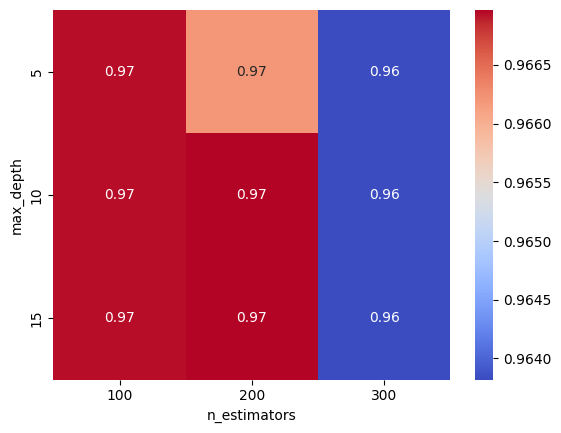

In [99]:
mean_test_scores = rf_gs.cv_results_['mean_test_score']
max_depths = rf_gs.cv_results_['param_max_depth'].data.astype(int)
n_estimators = rf_gs.cv_results_['param_n_estimators'].data.astype(int)

df = pd.DataFrame({'max_depth': max_depths, 'n_estimators': n_estimators, 'mean_test_score': mean_test_scores})

df_grouped = df.groupby(['max_depth', 'n_estimators']).mean().reset_index()

mean_test_scores_by_params = df_grouped.pivot(index='max_depth', columns='n_estimators', values='mean_test_score')

sns.heatmap(mean_test_scores_by_params, cmap='coolwarm', annot=True)

<h2>Validation</h2>

<h2>Hyper Parameter Tuning을 통해 최적화된 모델을 K-Fold Cross-Validation으로 검증</h2>

In [100]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [101]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

<h4>KNN</h4>

In [102]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [103]:
knn_scores = cross_validate(knn, X_train, y_train.values.ravel(), cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [104]:
print('Mean Accuracy:', knn_scores['test_accuracy'].mean())

Mean Accuracy: 0.7963054187192118


<h4>SVM</h4>

In [105]:
svm = SVC(C=0.1, gamma='scale', kernel='linear')

In [106]:
svm_scores = cross_validate(svm, X_train, y_train.values.ravel(), cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [107]:
print('Mean Accuracy:', svm_scores['test_accuracy'].mean())

Mean Accuracy: 0.9514778325123153


<h4>Decision Tree</h4>

In [108]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=13, min_samples_split=5)

In [109]:
dt_scores = cross_validate(dt, X_train, y_train.values.ravel(), cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [110]:
print('Mean Accuracy:', dt_scores['test_accuracy'].mean())

Mean Accuracy: 0.873399014778325


<h4>Random Forest</h4>

In [111]:
rf = RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=100)

In [112]:
rf_scores = cross_validate(rf, X_train, y_train.values.ravel(), cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [113]:
print('Mean Accuracy:', rf_scores['test_accuracy'].mean())

Mean Accuracy: 0.9793103448275862


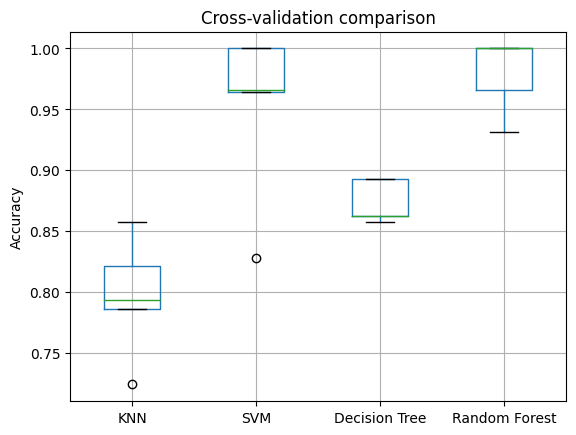

In [114]:
results = pd.DataFrame({'KNN': knn_scores['test_accuracy'], 'SVM': svm_scores['test_accuracy'], 'Decision Tree': dt_scores['test_accuracy'], 'Random Forest': rf_scores['test_accuracy']})

results.boxplot()
plt.ylabel('Accuracy')
plt.title('Cross-validation comparison')
plt.show()